<a href="https://colab.research.google.com/github/sks-saurav/Deep_learning_Learning/blob/main/mobileNet_fineTune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
test_path = '/content/drive/MyDrive/Keras/SignLanguage/test'
train_path = '/content/drive/MyDrive/Keras/SignLanguage/train'
valid_path = '/content/drive/MyDrive/Keras/SignLanguage/valid'

In [27]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
              .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
              .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
              .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)             

Found 1712 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [42]:
imgs, labels = next(train_batches)

In [43]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

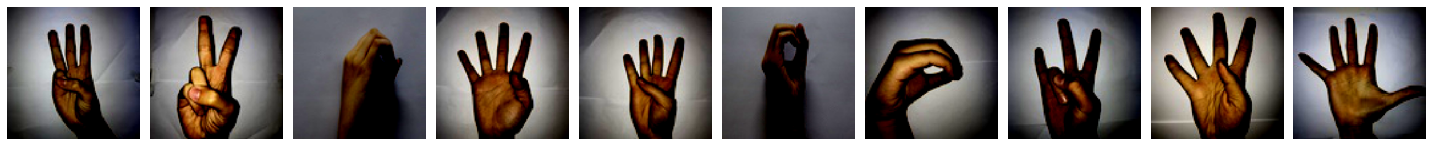

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [44]:
plotImages(imgs)
print(labels)

In [45]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [46]:
x = mobile.layers[-6].output
output = Dense(units=10, activation='softmax')(x)

In [47]:
model = Model(inputs=mobile.input, outputs=output)

In [48]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [49]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [50]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
172/172 - 116s - loss: 0.0091 - accuracy: 0.9994 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 2/30
172/172 - 115s - loss: 0.0058 - accuracy: 0.9994 - val_loss: 0.0161 - val_accuracy: 0.9967
Epoch 3/30
172/172 - 115s - loss: 0.0105 - accuracy: 0.9982 - val_loss: 0.0210 - val_accuracy: 0.9967
Epoch 4/30
172/172 - 115s - loss: 0.0078 - accuracy: 0.9994 - val_loss: 0.0185 - val_accuracy: 0.9933
Epoch 5/30
172/172 - 114s - loss: 0.0121 - accuracy: 0.9977 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 6/30
172/172 - 114s - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0224 - val_accuracy: 0.9900
Epoch 7/30
172/172 - 115s - loss: 0.0068 - accuracy: 0.9994 - val_loss: 0.0150 - val_accuracy: 0.9967
Epoch 8/30
172/172 - 114s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 9/30
172/172 - 115s - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0440 - val_accuracy: 0.9933
Epoch 10/30
172/172 - 114s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0097 - 

In [73]:
test_labels = test_batches.classes

In [74]:
predictions = model.predict(x=test_batches, verbose=0)

In [75]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [67]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

Confusion matrix, without normalization
[[1 0 0 1 0 0 2 1 0 0]
 [0 1 0 0 1 0 1 1 0 1]
 [0 0 1 0 1 1 0 1 0 1]
 [0 1 0 2 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 1 2 1]
 [1 1 1 0 1 1 0 0 0 0]
 [0 0 1 2 0 2 0 0 0 0]
 [1 1 1 0 0 0 0 1 1 0]
 [2 0 0 0 1 1 0 0 0 1]
 [0 0 1 0 1 0 1 0 1 1]]


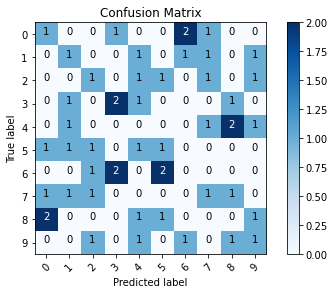

In [77]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')